#steps
0. preprocess
1. extract i/p and o/p columns
3.scale the values
4. train test split
5. train the model
5. evaluate the model/model selection
6. deploy the model

Classification (logistic regression)


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("placement.csv")

In [ ]:
df


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.shape

(100, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
import matplotlib.pyplot as plt

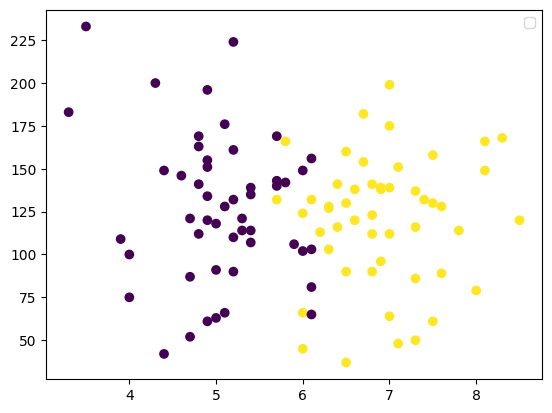

In [ ]:
plt.scatter(df["cgpa"], df["iq"], c=df["placement"])
plt.legend()


**extracting input and output columns**

In [ ]:
X = df.iloc[:, 0:2]    #first two columns (cgpa and iq)
y = df.iloc[:, -1]      #last column (placement)

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

**SPLIT train test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

**Scale input**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-1.1242685 , -0.0932138 ],
       [ 0.78127133,  0.39874791],
       [-0.07622159, -2.03516789],
       [ 0.11433239, -0.27446284],
       [ 0.87654832,  1.95231118],
       [ 0.40016337, -2.24230965],
       [-1.1242685 ,  0.70946056],
       [ 0.68599434, -0.01553563],
       [-0.83843753,  0.21749886],
       [-0.74316054, -0.06732108],
       [-1.1242685 ,  0.2692843 ],
       [-1.31482249, -0.9476736 ],
       [-1.02899151, -0.84410271],
       [ 1.35293328, -1.62088435],
       [-1.21954549,  1.17552954],
       [ 0.87654832, -0.30035557],
       [ 0.68599434, -0.30035557],
       [ 0.0190554 , -1.51731346],
       [ 0.68599434, -0.86999543],
       [ 1.1623793 , -0.19678468],
       [ 0.40016337,  0.94249505],
       [ 0.78127133,  0.37285519],
       [ 0.49544036, -0.0932138 ],
       [-0.26677558,  1.09785138],
       [-0.64788354, -0.24857012],
       [ 0.0190554 ,  0.21749886],
       [ 0.87654832,  0.39874791],
       [ 0.49544036,  0.37285519],
       [ 0.59071735,

In [ ]:
X_test = scaler.transform(X_test)

**MOdelling**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
#train the model
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
clf.predict([[9,100]])

array([1])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
test_df = pd.DataFrame(y_pred, y_test)

In [ ]:
test_df

,0
placement,
0,0
1,1
0,0
0,0
1,1
0,0
0,0
0,0
1,1


test accuracy of  **model**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

1.0

**model ka visual**

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
plot_decision_regions(X_train, y_train, clf = clf)

ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

In [ ]:
import numpy as np

<Axes: >

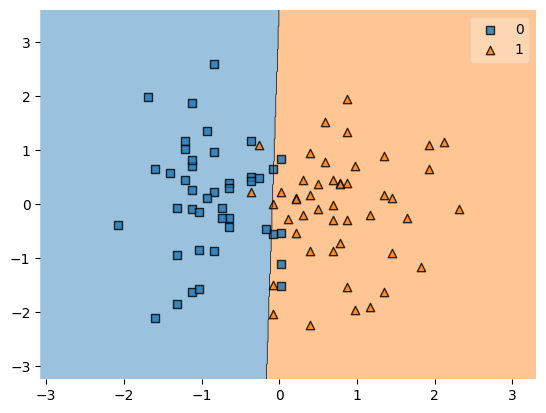

In [ ]:
plot_decision_regions(X_train, y_train.values, clf = clf)

**deploy the model**

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open("model.pkl", "wb"))